**Biomedical Software Engineering**

**Prof. Arthur Goldberg**

**Dept. Genetics and Genomic Sciences**

**Spring 1, 2020**

# Advanced Python: Numerical computing with `Pandas`

[`Pandas`](https://pandas.pydata.org/) provides 1-dimensional and 2-dimensional arrays containing multiple datatypes. It's an extensive package, built on Numpy, that supports I/O, several forms of indexing, plotting, and many functions on arrays.

See the [`Pandas` overview](https://pandas.pydata.org/docs/getting_started/overview.html), [10 minutes to pandas](https://pandas.pydata.org/docs/getting_started/10min.html) tutorial, [`pandas` User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide), and [`pandas` API Reference](https://pandas.pydata.org/docs/reference/index.html#api). 



In [0]:
import numpy as np
import pandas as pd

In [31]:
pd.Series([1, 3, 5, np.nan, 6, 8])  # Series is the 1D array

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [33]:
# DataFrame is a 2D array
# DataFrames are made from Serieses
# its rows & columns can be indexed
dates = pd.date_range('20130101', periods=6)  # a sequence of dates
print(dates)
# dates indexes the rows, 4 letters index the columns
example_df1 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
# really handy if your data has names for the rows & columns
# pandas prints & plots intelligently in ipython notebooks
example_df1

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-01-01,-0.309098,-0.232850,0.755738,-0.694032
2013-01-02,0.186691,-0.174264,0.803027,0.177351
2013-01-03,0.729045,0.995591,-2.009800,-1.412784
2013-01-04,-0.902423,0.952486,0.248184,0.235753
2013-01-05,-0.159413,0.370763,0.432158,-0.855853
2013-01-06,0.729570,1.287007,0.121859,-0.595130


In [35]:
# construct a DF from a dictionary
example_df = pd.DataFrame({'A': 1.,
              'B': pd.Timestamp('20130102'),
              'C': pd.Series(1, index=list(range(4)), dtype='float32'),
              'D': np.array([3] * 4, dtype='int32'),
              'E': pd.Categorical(["test", "train", "test", "train"]),
              'F': ['now', 'is', 'the', 'time']})
example_df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,now
1,1.0,2013-01-02,1.0,3,train,is
2,1.0,2013-01-02,1.0,3,test,the
3,1.0,2013-01-02,1.0,3,train,time


In [38]:
# each column has a different data type
example_df.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

**In `NumPy` every element of an array must be the same type; in `Pandas` each column can have a different type.**

Viewing a dataframe

In [39]:
# head and tail, like Unix
print(example_df.head(1))
example_df.tail(2)

     A          B    C  D     E    F
0  1.0 2013-01-02  1.0  3  test  now


,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,test,the
3,1.0,2013-01-02,1.0,3,train,time


In [13]:
# column labels
example_df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [14]:
# row labels
example_df.index

Int64Index([0, 1, 2, 3], dtype='int64')

Accessing elements

In [40]:
# Pandas has multiple indexing methods
# Access a column, returning a pandas.Series
example_df['B']

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]

In [42]:
# Slice accesses rows
example_df[:2]  # first 2 rows

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,now
1,1.0,2013-01-02,1.0,3,train,is


In [43]:
# .loc provides 2D indexing
# note the ':', meaning a slice of all of the rows
example_df.loc[:, ['B', 'A']]  # 2 columns

,B,A
0,2013-01-02,1.0
1,2013-01-02,1.0
2,2013-01-02,1.0
3,2013-01-02,1.0


In [44]:
example_df1.loc['20130102':'20130104', ['A', 'D']] # 2 rows of 2 columns

,A,D
2013-01-02,0.186691,0.177351
2013-01-03,0.729045,-1.412784
2013-01-04,-0.902423,0.235753


Assignment

In [25]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
# add a new column, with indices aligned
print(example_df1.head(2))
example_df1['F'] = s1   # assign column s1 to column 'F' in example_df1
example_df1             # note that col F doesn't have a value for row 2013-01-01

                   A         B         C         D    F
2013-01-01 -0.309098 -0.232850  0.755738 -0.694032  NaN
2013-01-02  0.186691 -0.174264  0.803027  0.177351  1.0


,A,B,C,D,F
2013-01-01,-0.309098,-0.232850,0.755738,-0.694032,NaN
2013-01-02,0.186691,-0.174264,0.803027,0.177351,1.0
2013-01-03,0.729045,0.995591,-2.009800,-1.412784,2.0
2013-01-04,-0.902423,0.952486,0.248184,0.235753,3.0
2013-01-05,-0.159413,0.370763,0.432158,-0.855853,4.0
2013-01-06,0.729570,1.287007,0.121859,-0.595130,5.0


Plotting

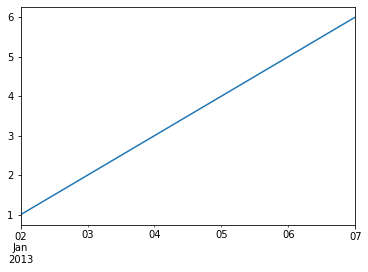

In [30]:
axes = s1.plot()

And much more!